## Deep Learning - Lab 09

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [1]:
!pip install gym

In [2]:
import numpy as np
import random
import gym
import time
from IPython.display import clear_output

In [3]:
env_taxi = gym.make('Taxi-v3')
env_taxi.env.s=env_taxi.encode(1,1,4,0)
env_taxi.render()

+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
state_size = env_taxi.observation_space.n
action_size = env_taxi.action_space.n
q_table_naive = np.zeros((state_size, action_size))
print(q_table_naive)
print('>> Shape of Q-table: ', q_table_naive.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
>> Shape of Q-table:  (500, 6)


**Naive-Learning**

In [5]:
num_episodes = 5000          # Total episodes
num_test_episodes = 100      # Total testing episodes
max_steps = 99               # Max steps per episode

In [6]:
rewards = []

for episode in range(num_episodes):
  print('EPISODE ', episode)
  state = env_taxi.reset()
  done = False
  step = 0
  total_rewards = 0

  for step in range(max_steps):
    # If all Q-values in current state is 0, choose a random action
    if np.max(q_table_naive[state, :]) == 0:
      action = np.random.randint(0, action_size)
    # Otherwise, choose the action with the largest Q-value
    else:
      action = np.argmax(q_table_naive[state, :])

    # Take the action and observe the outcome state and reward
    new_state, reward, done, info = env_taxi.step(action)

    # Update Q-value
    q_table_naive[state, action] += reward 

    total_rewards += reward

    state = new_state

    if done:
      break
  rewards.append(total_rewards)
  clear_output(wait=True)

print ("Score over time: " +  str(sum(rewards) / num_episodes))
print(q_table_naive)

Score over time: -137.8812
[[   0.    0.    0.    0.    0.    0.]
 [-242. -242. -242. -242. -242. -250.]
 [-215. -214. -214. -214. -214. -220.]
 ...
 [-115. -115. -114. -114. -120. -120.]
 [-146. -146. -145. -145. -150. -150.]
 [ -19.  -19.  -19.  -19.  -20.  -20.]]


**Q-Learning**

In [7]:
num_episodes = 5000           # Total episodes
max_steps = 99                # Max steps per episode
learning_rate = 0.7           # Learning rate
discounting_rate = 0.95       # Discouting rate

# Exploration parameters
epsilon = 1.0                # Exploration rate
max_epsilon = 1.0            # Exploration probability at start
min_epsilon = 0.01           # Minimum exploration probability
decay_rate = 0.01            # Exponential decay rate for exploration probability

In [8]:
q_table = np.zeros((state_size, action_size))

rewards = []

for episode in range(num_episodes):
  print('EPISODE ', episode)
  state = env_taxi.reset()
  done = False
  step = 0
  total_rewards = 0

  for step in range(max_steps):
    random_number = random.uniform(0, 1)

    if random_number > epsilon:
      # Exploitation
      action = np.argmax(q_table[state, :])

    else:
      # Exploration
      action = env_taxi.action_space.sample()

    # Take the action and observe the outcome state and reward
    new_state, reward, done, info = env_taxi.step(action)

    # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    update = reward + discounting_rate * np.max(q_table[new_state, :]) - q_table[state, action]
    q_table[state, action] = q_table[state, action] + learning_rate * update

    total_rewards += reward

    state = new_state

    if done:
      break

  # Reduce epsilon
  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)   

  rewards.append(total_rewards)
  clear_output(wait=True)

print ("Score over time: " +  str(sum(rewards) / num_episodes))
print(q_table)

Score over time: -2.7382
[[  0.           0.           0.           0.           0.
    0.        ]
 [ -6.01059361  -6.06422879  -5.9287095    0.96632794   5.20997639
  -13.08535498]
 [ -3.9596313   -4.07766031   4.36803397   3.43887236   7.93349184
  -11.77351189]
 ...
 [ -2.9187107   -3.1167822   -2.90172656  -3.47710127  -7.
  -10.88448655]
 [ -4.16243149  -4.39155222  -4.41448387  -4.82661687 -13.177949
  -11.21784274]
 [ -1.60272     -1.4574      -1.6571835   17.99996473  -7.
   -9.1       ]]


### Bài tập 1.
**Giải thích vì sao khi dùng Naive-Learning thì xe taxi chỉ đứng yên một chỗ?**

In [9]:
q_table_naive

array([[   0.,    0.,    0.,    0.,    0.,    0.],
       [-242., -242., -242., -242., -242., -250.],
       [-215., -214., -214., -214., -214., -220.],
       ...,
       [-115., -115., -114., -114., -120., -120.],
       [-146., -146., -145., -145., -150., -150.],
       [ -19.,  -19.,  -19.,  -19.,  -20.,  -20.]])

Trong Reinforcement Learning, với thuật toán Naive-Learning, agent chỉ đơn giản là thực hiện một action ngẫu nhiên nếu Q-value của tất cả các action tại state mà agent đang đứng đều bằng 0 và trong trường hợp ngược lại, agent chỉ thực hiện action có Q-value lớn nhất. Đồng thời, giá trị Q-value được cập nhật bằng một cách đơn giản là cộng reward nhận được tương ứng khi thực hiện action nào đó tại state tương ứng.

Khi chạy thuật toán Naive-Learning trong môi trường **Taxi-v3** ở trên, ta gặp tình trạng xe taxi đứng yên một chỗ. Về bản chất, chiếc xe không phải đứng yên 1 chỗ mà nó đang thực hiện 1 hành động duy nhất là đi vào ngõ cụt trong suốt một episode khiến ta thấy rằng chiếc taxi đang đứng yên. Ví dụ rằng chiếc taxi được khởi tạo đang ở vị trí ô có chữ Y, trong suốt 1 episode, chiếc xe chỉ thực hiện hành động đi về hướng West hoặc South, mà 2 hướng này là ngõ cụt (không thể đi tiếp). Do đó, chiếc taxi luôn giữ nguyên một vị trí trong suốt episode đó. Ta có thể biết được điều trên khi quan sát testing (mặc dù vị trí taxi không thay đổi nhưng reward vẫn nhận -1 ở mỗi step).

Từ Q-table ở trên, ta có thể thấy các action đón và trả khách hầu như có Q-value thấp hơn các action di chuyển. Lý do cho vấn đề trên đó là việc chọn ngẫu nhiên action ở thời điểm ban đầu, dẫn đến việc đón và trả khách sai vị trí nhiều, đồng thời reward nhận được nếu sai trong trường hợp này cũng thấp hơn rất nhiều so với việc chỉ di chuyển, nên reward nhận được bị âm nhiều hơn. Do đó, từ Q-table trên, chiếc taxi hầu như chỉ chọn thực hiện các action di chuyển. Ta cũng có thể thấy, có nhiều hơn 1 action có cùng Q-value. Trong trường hợp này, việc dùng hàm `np.argmax` luôn chọn action đầu tiên từ trái qua trong bộ các action có cùng Q-value. Do đó, trong một số trường hợp, xe taxi được khởi tạo ở các state có các action đi vào ngõ cụt có Q-value lớn nhất, thì xe luôn luôn chọn thực hiện duy nhất 1 action đó. Điều này dẫn đến việc taxi luôn giữ nguyên 1 vị trí trong suốt 1 episode.

### Bài tập 2.
**Giải thích vì sao khi dùng Q-Leaning thì xe taxi có thể đón và trả khách được?**

In [10]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -6.01059361,  -6.06422879,  -5.9287095 ,   0.96632794,
          5.20997639, -13.08535498],
       [ -3.9596313 ,  -4.07766031,   4.36803397,   3.43887236,
          7.93349184, -11.77351189],
       ...,
       [ -2.9187107 ,  -3.1167822 ,  -2.90172656,  -3.47710127,
         -7.        , -10.88448655],
       [ -4.16243149,  -4.39155222,  -4.41448387,  -4.82661687,
        -13.177949  , -11.21784274],
       [ -1.60272   ,  -1.4574    ,  -1.6571835 ,  17.99996473,
         -7.        ,  -9.1       ]])

Với thuật toán Q-Learning, ta tránh được tình trạng xe taxi chỉ đứng yên một chỗ ở một số trường hợp và không thể đón trả khách theo đúng yêu cầu của bài toán. Thuật toán Q-Learning không hoàn toàn chọn action có Q-value lớn nhất trong mọi state mà chọn action dựa theo 2 hành động là **exploration** và **exploitation**:

  * **Exploration**: *chọn ra một action một cách ngẫu nhiên ứng với state tương ứng để khám phá những gì sẽ xảy ra với môi trường*. Khi agent mới vào môi trường, lượng thông tin bị hạn hẹp, do đó ta cần thực hiện **explore** để tăng cường lượng thông tin về môi trường cho agent có thể học nhanh hơn.
  * **Exploitation**: Sau một thời gian **explore**, khi agent đã biết được một số thông tin cần thiết về môi trường thông qua Q-table, chúng ta sẽ thực hiện hành động **exploit**, tức là *chọn ra action có Q-value lớn nhất ứng với state tương ứng*.

Với việc kết hợp thực hiện 2 hành động trên thay vì chỉ chọn action có Q-value lớn nhất như trong thuật toán Naive-Learning, ta giảm thiểu được lượng reward âm nhận được khi đón, trả khách sai vị trí. Điều đó giúp ta tránh được việc agent chỉ ưu tiên thực hiện các action di chuyển mà không đón, trả khách theo yêu cầu của bài toán trong lúc testing.

Một điều nữa khiến thuật toán Q-Learning tối ưu hơn thuật toán Naive-Learning là khả năng cập nhật các giá trị trong Q-table. Thuật toán cập nhật Q-value theo công thức sau:
$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha [r_{t+1} + \gamma \max_{a}Q(s_{t+1}, a) - Q(s_t, a_t)]$$
với $\alpha$ là learning rate, $\gamma$ là discount rate, $s_t$ là state tại thời điểm t và $r_{t+1}$ là reward nhận được sau khi thực hiện action $a_t$ ở state $s_t$ để chuyển sang state $s_{t+1}$.

Điều chúng ta đang làm với công thức trên là điều chỉnh Q-value dựa trên sự khác biệt giữa discounted new values và old values. Ta dùng discount rate để xác định tầm quan trọng của reward nhận được trong tương lai và learning rate để xác định mức độ thông tin mới thu được sẽ ghi đè lên thông tin cũ. Với cách cập nhật trên, ta tránh được tình trạng nhiều action có cùng Q-value.

Nhìn vào Q-table ở trên, ta thấy rằng việc áp dụng thuật toán Q-Learning đã giúp ta tránh được các vấn đề gặp ở thuật toán Naive-Learning như các action đón và trả khách có Q-value luôn nhỏ hơn các action khác, có nhiều action có cùng Q-value dẫn đến việc luôn chọn 1 action khi đến state tương ứng,... Hơn nữa, các giá trị trong Q-table cũng được scale lại, không còn mang con số quá lớn như khi thực hiện Naive-Learning và các Q-value của các action chênh lệch nhau rõ ràng hơn. Do đó, khi dùng thuật toán Q-Learning, agent có thể di chuyển với đường đi tối ưu, thực hiện đón, trả khách đúng vị trí và nhận được reward tối ưu nhất.

### Bài tập 3.
**Tìm hiểu một game khác trên OpenAI và thiết lập cho agent chơi được**

* Trong phần này, ta sẽ nói về một environment đơn giản là FrozenLake8x8-v0. Mô tả về environment này như sau: Mùa đông đến rồi. Bạn đang cùng bạn bè chơi trò ném đĩa ở công viên, nhưng không may chiếc đĩa bay ra giữa hồ nước bị đóng băng. Mặc dù nước trong hồ hầu như bị đóng băng, nhưng vẫn có một vài chỗ băng bị tan tạo nên các hố băng. Nếu bạn bước vào một trong những cái hố đó, bạn sẽ bị rơi xuống nước đóng băng. Lúc này, chiếc đĩa khá hiếm nên bạn bắt buộc phải đi vào đó để nhặt lại chiếc đĩa. Tuy nhiên, mặt băng khá trơn nên không phải lúc nào bạn cũng di chuyển theo hướng bạn chỉ định.

* Frozen Lake environment là một lưới 8x8 chứa các ô:
  * **S**: Điểm bắt đầu (starting point)
  * **F**: Bề mặt bị đóng băng (frozen surface)
  * **H**: Hố băng (hole)
  * **G**: Điểm đích (goal)

* Con agent sẽ đóng vai trò là bạn và di chuyển trên mạng lưới này từ điểm bắt đầu (**S**). Một episode sẽ kết thúc khi agent đến được điểm đích (**G**) hoặc rơi vào hố băng (**H**). Nếu agent rơi vào hố băng, nó sẽ phải quay lại điểm bắt đầu (**S**). Dưới đây là hình ảnh minh hoạ cho Frozen Lake với phiên bản 4x4:

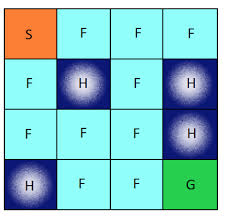

* Agent của chúng ta có thể thực hiện 4 actions:
  * 0 : Lên trên
  * 1 : Xuống dưới
  * 2 : Sang trái
  * 3 : Sang phải

  Tuy nhiên, do environment là mặt băng rất trơn, nên ở một vài trường hợp agent sẽ không thể đi theo hướng được chỉ định mà bị độ trơn của mặt băng làm lệch đi sang một hướng khác. Đây cũng là thử thách lớn nhất của trò chơi này.

* Reward của environment này được tính như sau: 

  Agent sẽ nhận được **1** nếu nó đi đến được điểm đích (**G**) và nhận được **0** nếu rơi vào hố băng (**H**).

  


In [11]:
env = gym.make('FrozenLake8x8-v0')
env.reset()
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [12]:
state_size = env.observation_space.n
action_size = env.action_space.n

qtable = np.zeros((state_size, action_size))

In [13]:
FILE_SAVE_Q_LEARNING = "q_table_qlearning.npy"

num_episodes = 300000         # Total episodes
num_test_episodes = 10        # Total testing episodes
max_steps = 400               # Max steps per episode
learning_rate = 0.8           # Learning rate
discounting_rate = 0.9        # Discouting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001           # Minimum exploration probability
decay_rate = 0.00005          # Exponential decay rate for exploration probability

In [14]:
rewards = []

for episode in range(num_episodes):
  state = env.reset()
  done = False
  step = 0
  total_rewards = 0

  for step in range(max_steps):
    random_number = random.uniform(0, 1)

    if random_number > epsilon:
      # Exploitation
      action = np.argmax(qtable[state, :])

    else:
      # Exploration
      action = env.action_space.sample()

    # Take the action and observe the outcome state and reward
    new_state, reward, done, info = env.step(action)

    # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    update = reward + discounting_rate * np.max(qtable[new_state, :]) - qtable[state, action]
    qtable[state, action] = qtable[state, action] + learning_rate * update

    total_rewards += reward

    state = new_state

    if done == True:
      print('Episode: {}\t-\tReward: {}\t-\tStep Taken: {}'.format(episode, total_rewards, step))
      break

  # Reduce epsilon
  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)   

  rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards) / num_episodes))

Streaming output truncated to the last 5000 lines.
Episode: 295001	-	Reward: 1.0	-	Step Taken: 69
Episode: 295002	-	Reward: 1.0	-	Step Taken: 178
Episode: 295003	-	Reward: 1.0	-	Step Taken: 74
Episode: 295004	-	Reward: 0.0	-	Step Taken: 53
Episode: 295005	-	Reward: 1.0	-	Step Taken: 49
Episode: 295006	-	Reward: 1.0	-	Step Taken: 60
Episode: 295007	-	Reward: 1.0	-	Step Taken: 60
Episode: 295008	-	Reward: 1.0	-	Step Taken: 55
Episode: 295009	-	Reward: 1.0	-	Step Taken: 77
Episode: 295010	-	Reward: 1.0	-	Step Taken: 147
Episode: 295011	-	Reward: 0.0	-	Step Taken: 130
Episode: 295012	-	Reward: 1.0	-	Step Taken: 57
Episode: 295013	-	Reward: 1.0	-	Step Taken: 89
Episode: 295014	-	Reward: 1.0	-	Step Taken: 86
Episode: 295015	-	Reward: 1.0	-	Step Taken: 106
Episode: 295016	-	Reward: 0.0	-	Step Taken: 125
Episode: 295017	-	Reward: 1.0	-	Step Taken: 177
Episode: 295018	-	Reward: 1.0	-	Step Taken: 44
Episode: 295019	-	Reward: 1.0	-	Step Taken: 133
Episode: 295020	-	Reward: 1.0	-	Step Taken: 112
E

In [15]:
# Saving Q-table
np.save(FILE_SAVE_Q_LEARNING, qtable)

In [16]:
# qtable = np.load(FILE_SAVE_Q_LEARNING)

rewards = []
num_steps = []

for episode in range(num_test_episodes):
  state = env.reset()
  done = False
  step = 0
  total_rewards = 0

  for step in range(max_steps):
    print('='*25)
    print('EPISODE ', episode)
    print('='*25)
    print('Step: ', step + 1)

    action = np.argmax(qtable[state, :])

    # Take the action and observe the outcome state and reward
    new_state, reward, done, info = env.step(action)

    # Display the game
    env.render()

    total_rewards += reward
    time.sleep(0.3)
    state = new_state
    
    if done:
      rewards.append(total_rewards)
      num_steps.append(step + 1)
      # env.render()
      if reward == 1:
          print("**** You have reached the goal! ****")
          time.sleep(2)
      else:
          print("**** You fell through a hole! ****")
          time.sleep(2)
      if episode != (num_test_episodes - 1):
        clear_output(wait=True)
      break
    clear_output(wait=True)

env.close()
print('Success Percentage = {0:.2f} %'.format(100 * np.sum(rewards) / len(rewards)))
print('Average number of steps taken to reach the goal = {0:.2f}'.format(np.mean(num_steps)))


EPISODE  9
Step:  41
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
**** You have reached the goal! ****
Success Percentage = 90.00 %
Average number of steps taken to reach the goal = 112.40
